In [ ]:

#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf
print ("Done")

Done


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle_api/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download uwrfkaggler/ravdess-emotional-speech-audio --unzip

 99% 425M/429M [00:12<00:00, 37.8MB/s]
100% 429M/429M [00:12<00:00, 36.4MB/s]


In [ ]:
!apt-get update
!apt-get install -y libsndfile1

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [48.6 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,046 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,326 kB]
Get:13 https://ppa.launchpadco

In [ ]:
#preparing data set

ravdess = "audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['Actor_24', 'Actor_03', 'Actor_12', 'Actor_17', 'Actor_02', 'Actor_07', 'Actor_16', 'Actor_22', 'Actor_10', 'Actor_15', 'Actor_14', 'Actor_01', 'Actor_11', 'Actor_13', 'Actor_04', 'Actor_23', 'Actor_05', 'Actor_21', 'Actor_19', 'Actor_18', 'Actor_20', 'Actor_06', 'Actor_09', 'Actor_08']


In [ ]:
!kaggle datasets download ejlok1/toronto-emotional-speech-set-tess --unzip

100% 426M/428M [00:14<00:00, 38.6MB/s]
100% 428M/428M [00:14<00:00, 31.2MB/s]


In [ ]:
Crema = "AudioWAV/"
Tess = "TESS Toronto emotional speech set data/"
Savee = "ALL/"

In [ ]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess + i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + i + '/' + f)

In [ ]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-01-01-02-02-08.wav
03
audio_speech_actors_01-24/Actor_24/03-01-04-01-01-01-24.wav
4
03-01-04-02-01-02-08.wav


In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1: 'neutral', 2: 'happy', 3: 'sad', 4: 'angry', 5: 'fear', 6: 'disgust'}, inplace=True)

# Usuwanie rekordów, które nie mają jednej z 6 oczekiwanych etykiet emocji
ravdess_df = ravdess_df[ravdess_df.Emotions.isin(['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust'])]

# Wyświetlenie danych i liczby etykiet emocji
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())


  Emotions                                               Path
0    angry  audio_speech_actors_01-24/Actor_24/03-01-04-01...
1    happy  audio_speech_actors_01-24/Actor_24/03-01-02-02...
2    angry  audio_speech_actors_01-24/Actor_24/03-01-04-01...
4      sad  audio_speech_actors_01-24/Actor_24/03-01-03-01...
5    happy  audio_speech_actors_01-24/Actor_24/03-01-02-02...
______________________________________________
     Emotions                                               Path
1434      sad  audio_speech_actors_01-24/Actor_08/03-01-03-02...
1435  disgust  audio_speech_actors_01-24/Actor_08/03-01-06-02...
1436  disgust  audio_speech_actors_01-24/Actor_08/03-01-06-01...
1437  disgust  audio_speech_actors_01-24/Actor_08/03-01-06-02...
1439    angry  audio_speech_actors_01-24/Actor_08/03-01-04-02...
_______________________________________________
angry      192
happy      192
sad        192
fear       192
disgust    192
neutral     96
Name: Emotions, dtype: int64


In [ ]:
!kaggle datasets download ejlok1/cremad --unzip



100% 450M/451M [00:13<00:00, 43.7MB/s]
100% 451M/451M [00:13<00:00, 36.2MB/s]


In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        None

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())


fear       1271
angry      1271
disgust    1271
happy      1271
sad        1271
neutral    1087
Name: Emotions, dtype: int64


In [ ]:
! kaggle datasets download ejlok1/toronto-emotional-speech-set-tess --unzip

100% 426M/428M [00:11<00:00, 44.4MB/s]
100% 428M/428M [00:11<00:00, 40.5MB/s]


In [ ]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0].split('_')[2]
        if part != 'ps':  # Ignorowanie plików oznaczonych jako 'surprise'
            file_emotion.append(part)
            file_path.append(Tess + dir + '/' + file)

# Tworzenie dataframe'ów dla emocji i ścieżek plików
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)

# Wyświetlanie liczby etykiet emocji
print(Tess_df.Emotions.value_counts())


angry      400
sad        400
disgust    400
fear       400
neutral    400
happy      400
Name: Emotions, dtype: int64


In [ ]:
!kaggle datasets download ejlok1/surrey-audiovisual-expressed-emotion-savee --unzip


 98% 105M/107M [00:03<00:00, 43.0MB/s] 
100% 107M/107M [00:03<00:00, 34.6MB/s]


In [ ]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    part = file.split('_')[1]
    ele = part[:-6]
    if ele in ['a', 'd', 'f', 'h', 'n', 'sa']:
        file_path.append(Savee + file)
        if ele == 'a':
            file_emotion.append('angry')
        elif ele == 'd':
            file_emotion.append('disgust')
        elif ele == 'f':
            file_emotion.append('fear')
        elif ele == 'h':
            file_emotion.append('happy')
        elif ele == 'n':
            file_emotion.append('neutral')
        elif ele == 'sa':
            file_emotion.append('sad')

# Tworzenie DataFrame
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())

neutral    120
angry       60
disgust     60
fear        60
happy       60
sad         60
Name: Emotions, dtype: int64


In [ ]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Tess_df,Crema_df, Savee_df, ravdess_df], axis = 0)
#, Tess_df,Crema_df Savee_df ravdess_df,
data_path.to_csv("data_path.csv",index=False)
data_path.head()

liczba_plikow = len(data_path)
print("Liczba plików:", liczba_plikow)


Liczba plików: 11318


In [ ]:
print(data_path.Emotions.value_counts())

angry      1923
sad        1923
disgust    1923
fear       1923
happy      1923
neutral    1703
Name: Emotions, dtype: int64


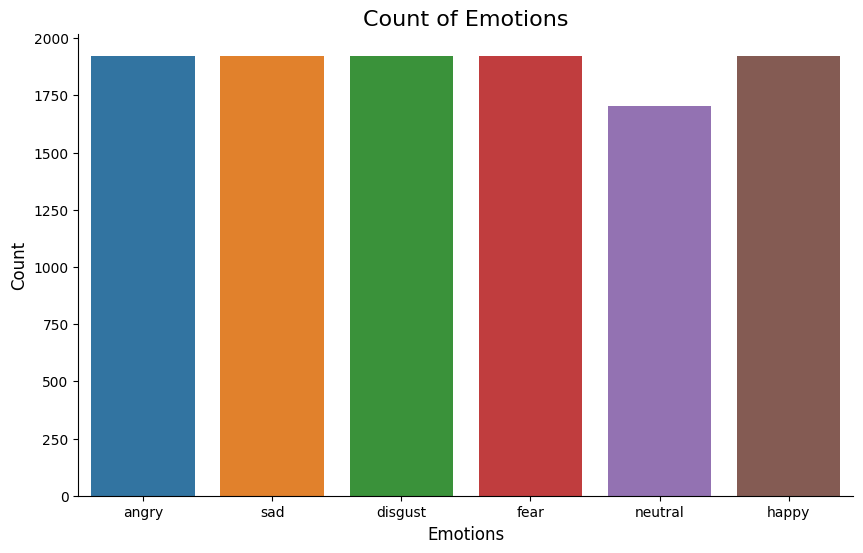

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.title('Count of Emotions', size=16)
sns.countplot(data=data_path, x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()



In [ ]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

In [ ]:
import librosa
import inspect
print(librosa.__version__)
print(inspect.signature(librosa.effects.time_stretch))



0.10.1
(y: numpy.ndarray, *, rate: float, **kwargs: Any) -> numpy.ndarray


In [ ]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data):
    rmse=librosa.feature.rms(y=data)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)

    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))

    pitched_audio=librosa.effects.pitch_shift(data, sr=sr, n_steps=0.7)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))

    pitched_audio1=librosa.effects.pitch_shift(data, sr=sr, n_steps=0.7)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))

    return audio

In [ ]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  8


In [ ]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)

1it [00:00,  9.02it/s]

0 audio has been processed


502it [01:11,  7.24it/s]

500 audio has been processed


1002it [02:11,  8.49it/s]

1000 audio has been processed


1502it [03:17,  6.51it/s]

1500 audio has been processed


2002it [04:16,  9.81it/s]

2000 audio has been processed


2502it [05:14,  7.08it/s]

2500 audio has been processed


3002it [06:31,  6.25it/s]

3000 audio has been processed


3502it [07:48,  6.75it/s]

3500 audio has been processed


4002it [09:06,  6.14it/s]

4000 audio has been processed


4502it [10:22,  6.34it/s]

4500 audio has been processed


5002it [11:37,  6.04it/s]

5000 audio has been processed


5502it [12:53,  7.63it/s]

5500 audio has been processed


6002it [14:10,  7.19it/s]

6000 audio has been processed


6502it [15:25,  6.72it/s]

6500 audio has been processed


7002it [16:41,  7.33it/s]

7000 audio has been processed


7502it [18:00,  5.77it/s]

7500 audio has been processed


8002it [19:19,  6.23it/s]

8000 audio has been processed


8501it [20:35,  5.74it/s]

8500 audio has been processed


9002it [21:51,  6.78it/s]

9000 audio has been processed


9502it [23:08,  6.05it/s]

9500 audio has been processed


10002it [24:28,  5.90it/s]

10000 audio has been processed


10502it [25:59,  5.71it/s]

10500 audio has been processed


11002it [27:32,  5.54it/s]

11000 audio has been processed


11318it [28:31,  6.61it/s]

Done
Time:  1711.5604022490002


In [ ]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.031738,0.050781,0.064453,0.059570,0.048340,0.035156,0.026855,0.021973,0.024414,0.024414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
1,0.154785,0.176758,0.194336,0.102051,0.104004,0.123047,0.142090,0.153320,0.154297,0.158691,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
2,0.034180,0.049316,0.075684,0.072754,0.062988,0.053223,0.032715,0.023438,0.023438,0.028320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
3,0.080078,0.095215,0.121582,0.085449,0.074707,0.069824,0.053223,0.044434,0.052734,0.057617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
4,0.041016,0.049805,0.055176,0.036621,0.024902,0.021484,0.026367,0.033203,0.042480,0.055664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry


In [ ]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.031738,0.050781,0.064453,0.059570,0.048340,0.035156,0.026855,0.021973,0.024414,0.024414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
1,0.154785,0.176758,0.194336,0.102051,0.104004,0.123047,0.142090,0.153320,0.154297,0.158691,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
2,0.034180,0.049316,0.075684,0.072754,0.062988,0.053223,0.032715,0.023438,0.023438,0.028320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
3,0.080078,0.095215,0.121582,0.085449,0.074707,0.069824,0.053223,0.044434,0.052734,0.057617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
4,0.041016,0.049805,0.055176,0.036621,0.024902,0.021484,0.026367,0.033203,0.042480,0.055664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry


In [ ]:
print(Emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [ ]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(45272, 2377)

In [ ]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

In [ ]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions


X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [ ]:
# # As this is a multiclass classification problem onehotencoding our Y
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# encoder = OneHotEncoder()
# Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Assuming Y is the array or list you're trying to one-hot encode
# Convert all elements in Y to strings
Y_str = np.array(Y).astype(str)

# Now apply OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(Y_str.reshape(-1, 1)).toarray()

In [ ]:
print(Y.shape)
X.shape

(45272, 6)


(45272, 2376)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((36217, 2376), (36217, 6), (9055, 2376), (9055, 6))

In [ ]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((36217, 2376), (36217, 6), (9055, 2376), (9055, 6))

In [ ]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [ ]:

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max', restore_best_weights=True)

lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.0001)



In [ ]:
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((36217, 2376, 1), (36217, 6), (9055, 2376, 1), (9055, 6))

In [ ]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(6,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (Batch  (None, 2376, 512)         2048      
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 1188, 512)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Bat  (None, 1188, 512)         2048      
 chNormalization)                                                
                                                      

In [ ]:
history=model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=128,callbacks=[early_stop,lr_reduction,model_checkpoint])


Epoch 1/50
283/283 [==============================] - 70s 214ms/step - loss: 1.3997 - accuracy: 0.4609 - val_loss: 2.2193 - val_accuracy: 0.2509 - lr: 0.0010
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


283/283 [==============================] - 56s 199ms/step - loss: 1.1017 - accuracy: 0.5661 - val_loss: 1.2245 - val_accuracy: 0.5174 - lr: 0.0010
Epoch 3/50
283/283 [==============================] - 56s 199ms/step - loss: 0.9872 - accuracy: 0.6160 - val_loss: 1.1526 - val_accuracy: 0.5725 - lr: 0.0010
Epoch 4/50
283/283 [==============================] - 56s 199ms/step - loss: 0.8791 - accuracy: 0.6611 - val_loss: 1.0000 - val_accuracy: 0.6212 - lr: 0.0010
Epoch 5/50
283/283 [==============================] - 56s 199ms/step - loss: 0.7783 - accuracy: 0.7032 - val_loss: 0.8454 - val_accuracy: 0.6773 - lr: 0.0010
Epoch 6/50
283/283 [==============================] - 56s 199ms/step - loss: 0.6445 - accuracy: 0.7607 - val_loss: 0.7477 - val_accuracy: 0.7208 - lr: 0.0010
Epoch 7/50
283/283 [==============================] - 56s 199ms/step - loss: 0.5090 - accuracy: 0.8137 - val_loss: 0.6920 - val_accuracy: 0.7372 - lr: 0.0010
Epoch 8/50
283/283 [==============================] - 56s 199ms

283/283 [==============================] - 4s 15ms/step - loss: 0.0707 - accuracy: 0.9822
Accuracy of our model on test data :  98.22197556495667 %


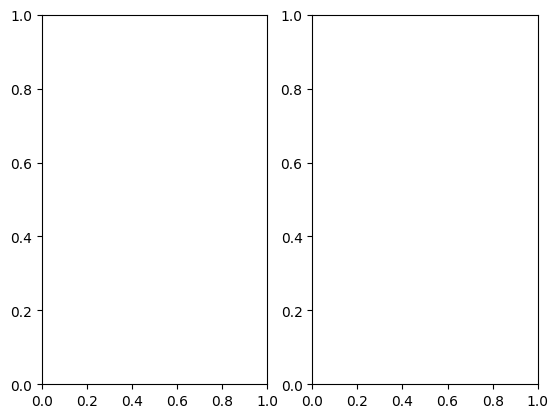

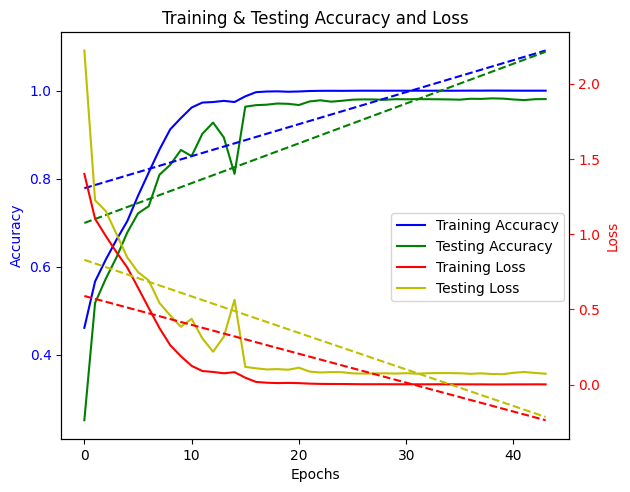

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(44)]
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']
fig, ax1 = plt.subplots()

# Wykresy dla dokładności
ax1.plot(epochs, train_acc, label='Training Accuracy', color='b')
ax1.plot(epochs, test_acc, label='Testing Accuracy', color='g')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params('y', colors='b')

# Trend lines for accuracy
z_train_acc = np.polyfit(epochs, train_acc, 1)
p_train_acc = np.poly1d(z_train_acc)
ax1.plot(epochs, p_train_acc(epochs), linestyle="--", color='b')

z_test_acc = np.polyfit(epochs, test_acc, 1)
p_test_acc = np.poly1d(z_test_acc)
ax1.plot(epochs, p_test_acc(epochs), linestyle="--", color='g')

# Druga oś Y dla straty
ax2 = ax1.twinx()
ax2.plot(epochs, train_loss, label='Training Loss', color='r')
ax2.plot(epochs, test_loss, label='Testing Loss', color='y')
ax2.set_ylabel('Loss', color='r')
ax2.tick_params('y', colors='r')

# Trend lines for loss
z_train_loss = np.polyfit(epochs, train_loss, 1)
p_train_loss = np.poly1d(z_train_loss)
ax2.plot(epochs, p_train_loss(epochs), linestyle="--", color='r')

z_test_loss = np.polyfit(epochs, test_loss, 1)
p_test_loss = np.poly1d(z_test_loss)
ax2.plot(epochs, p_test_loss(epochs), linestyle="--", color='y')

fig.tight_layout()
plt.title('Training & Testing Accuracy and Loss')
fig.legend(loc='center right', bbox_to_anchor=(0.9, 0.5))
plt.show()

283/283 [==============================] - 4s 14ms/step - loss: 0.0707 - accuracy: 0.9822
Accuracy of our model on test data :  98.22197556495667 %


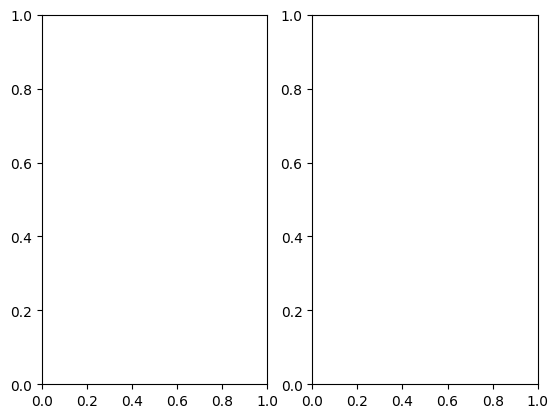

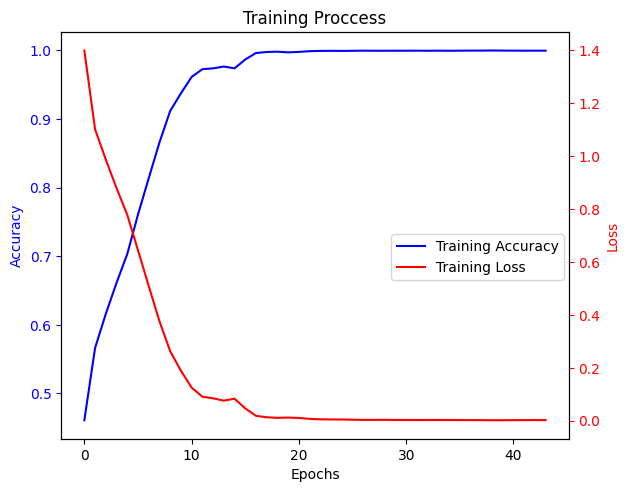

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(44)]
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']
fig, ax1 = plt.subplots()

# Wykresy dla dokładności
ax2 = ax1.twinx()
ax1.plot(epochs, train_acc, label='Training Accuracy', color='b')

ax2.plot(epochs, train_loss, label='Training Loss', color='r')
# ax1.plot(epochs, test_acc, label='Testing Accuracy', color='g')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params('y', colors='b')

ax2.set_ylabel('Loss', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Training Proccess')
fig.legend(loc='center right', bbox_to_anchor=(0.9, 0.5))
plt.show()

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(45)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']
fig.set_size_inches(20,6)

# Plotting training and testing loss with trend lines
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Testing Loss')

# Calculating and plotting trend line for loss
z_train_loss = np.polyfit(epochs, train_loss, 1)
p_train_loss = np.poly1d(z_train_loss)
ax[0].plot(epochs, p_train_loss(epochs), linestyle="--", label='Trend Training Loss')

z_test_loss = np.polyfit(epochs, test_loss, 1)
p_test_loss = np.poly1d(z_test_loss)
ax[0].plot(epochs, p_test_loss(epochs), linestyle="--", label='Trend Testing Loss')

ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

# Plotting training and testing accuracy with trend lines
ax[1].plot(epochs, train_acc, label='Training Accuracy')
ax[1].plot(epochs, test_acc, label='Testing Accuracy')

# Calculating and plotting trend line for accuracy
z_train_acc = np.polyfit(epochs, train_acc, 1)
p_train_acc = np.poly1d(z_train_acc)
ax[1].plot(epochs, p_train_acc(epochs), linestyle="--", label='Trend Training Accuracy')

z_test_acc = np.polyfit(epochs, test_acc, 1)
p_test_acc = np.poly1d(z_test_acc)
ax[1].plot(epochs, p_test_acc(epochs), linestyle="--", label='Trend Testing Accuracy')

ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")

plt.show()

In [ ]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

283/283 [==============================] - 4s 13ms/step


,Predicted Labels,Actual Labels
0,sad,sad
1,disgust,disgust
2,angry,angry
3,happy,happy
4,angry,angry
5,disgust,disgust
6,neutral,neutral
7,fear,fear
8,disgust,disgust
9,disgust,disgust


In [ ]:
df0

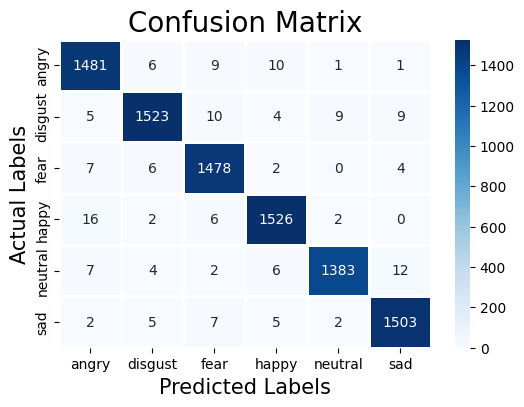

              precision    recall  f1-score   support

       angry       0.98      0.98      0.98      1508
     disgust       0.99      0.98      0.98      1560
        fear       0.98      0.99      0.98      1497
       happy       0.98      0.98      0.98      1552
     neutral       0.99      0.98      0.98      1414
         sad       0.98      0.99      0.98      1524

    accuracy                           0.98      9055
   macro avg       0.98      0.98      0.98      9055
weighted avg       0.98      0.98      0.98      9055



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (6, 4))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.0f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=15)
plt.ylabel('Actual Labels', size=15)
plt.show()
print(classification_report(y_test0, y_pred0))

In [ ]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("CNN_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("CNN_model_weights.h5")
print("Saved model to disk")

In [ ]:

#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf
print ("Done")

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('/content/CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/CNN_model_weights.h5")
print("Loaded model from disk")

In [ ]:
scaler = StandardScaler()

In [ ]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()

In [ ]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [ ]:
import pickle

# Saving scaler
with open('/scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('/scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('/encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('/encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)


print("Done")

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("best_model1_weights.h5")
print("Loaded model from disk")

In [ ]:
import pickle

with open('/scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

with open('/encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)


print("Done")

In [ ]:
import librosa

In [ ]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

In [ ]:
def get_predict_feat(path):
    d, s_rate= librosa.load(path, duration=2.5, offset=0.6)
    res=extract_features(d)
    result=np.array(res)
    result=np.reshape(result,newshape=(1,2376))
    i_result = scaler2.transform(result)
    final_result=np.expand_dims(i_result, axis=2)

    return final_result

In [ ]:
res=get_predict_feat("/happy.wav")
print(res.shape)

In [ ]:
emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}
def prediction(path1):
    res=get_predict_feat(path1)
    predictions=loaded_model.predict(res)
    y_pred = encoder2.inverse_transform(predictions)
    print(y_pred)